# Chapter 5

In [202]:
import numpy as np
import math
import statistics as stats
import scipy.stats as scistats
import matplotlib.pyplot as plt
import os
from pandas import read_table, read_csv
from netCDF4 import Dataset as ds
import cartopy
import cartopy.feature as cpf
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# These import statements bring in the python packages we'll need. 

plt.rcParams['figure.figsize'] = (12, 12)

In [216]:
PDA = np.array(read_table("darwinSLP.txt", header = None, delimiter = "\s+"))
PTA = np.array(read_table("tahitiSLP.txt", header = None, delimiter = "\s+"))

pdamon = PDA[96:,1:].flatten(order='C')
ptamon = PTA[96:,1:].flatten(order='C')

pdata = np.empty((2,pdamon.shape[0]))
pdata[0,:] = pdamon
pdata[1,:] = ptamon
firstYear = 1950
years = np.linspace(firstYear + 1, firstYear + 64, 12*64)

u, s, v = np.linalg.svd(np.transpose(pdata))

In [12]:
print("u: ", u)
print("dimension of u: ", u.shape)
print("s: ", s)
print("dimension of s: ", s.shape)
print("v: ", v)
print("dimension of v: ", v.shape)

u:  [[-0.03599866 -0.07674108 -0.03609418 ... -0.03533006 -0.03514102
  -0.03571684]
 [-0.0359683  -0.05475714 -0.00423348 ...  0.0196959   0.02300534
   0.00595389]
 [-0.03598428 -0.00561088  0.99873796 ... -0.00116774 -0.00115182
  -0.00122009]
 ...
 [-0.03612341  0.01828    -0.00120001 ...  0.99835136 -0.00170771
  -0.00138915]
 [-0.03605918  0.02158732 -0.00118853 ... -0.00171224  0.9982183
  -0.00140963]
 [-0.03599141  0.00456211 -0.00123382 ... -0.00137066 -0.00138667
   0.99870974]]
dimension of u:  (768, 768)
s:  [39634.96817557    41.74172334]
dimension of s:  (2,)
v:  [[-0.70617056 -0.70804177]
 [ 0.70804177 -0.70617056]]
dimension of v:  (2, 2)


## Figure 5.1

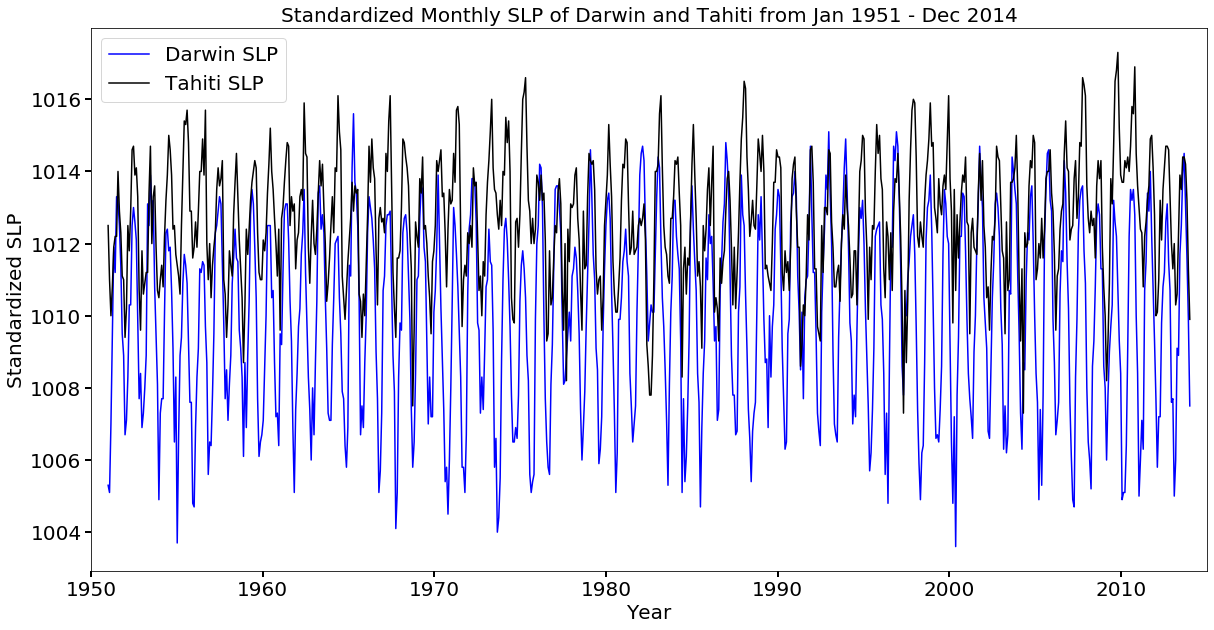

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(years, pdata[0], 'b-', label = r"Darwin SLP")
ax.plot(years, pdata[1], 'k-', label = r"Tahiti SLP")
ax.set_title("Standardized Monthly SLP of Darwin and Tahiti from Jan 1951 - Dec 2014", size = 20)
ax.set_xlabel("Year", size = 20)
ax.set_ylabel("Standardized SLP", size = 20);
ax.tick_params(length=6, width=2, labelsize=20);
ax.set_xlim(min(years)-1,max(years)+1)
ax.legend(loc = 'best', prop={'size':20});

## Figure 5.2

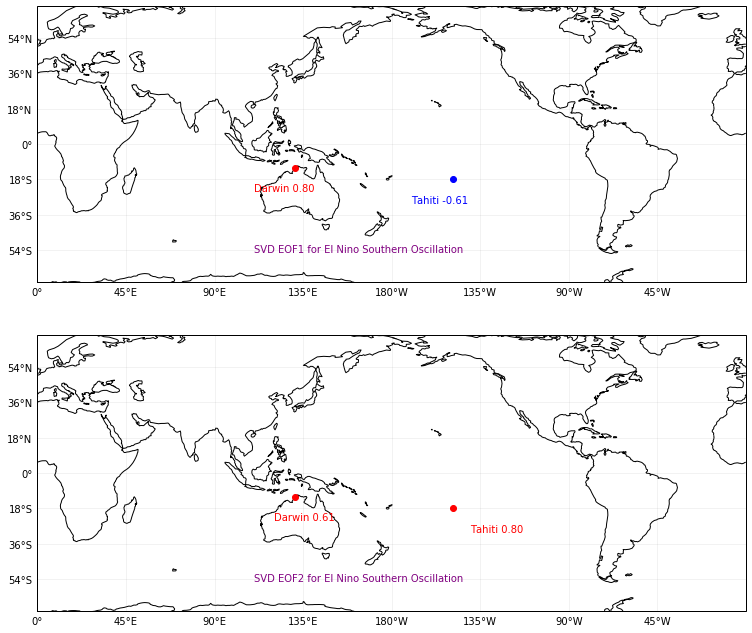

In [215]:
fig, ax = plt.subplots(2,figsize=(18,9))


ax[0] = plt.subplot(2, 1, 1, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax[0].set_extent([0,359, -70, 70])
ax[0].coastlines()
ax[0].plot(131-180, -12, 'ro')
ax[0].text(110-180, -24, "Darwin 0.80", color='r')
ax[0].plot(211-180,-18, 'bo')
ax[0].text(190-180, -30, "Tahiti -0.61", color='b')
ax[0].text(-70, -55, "SVD EOF1 for El Nino Southern Oscillation", color='purple')
gl1 = ax[0].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.1, linestyle='-')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xlocator = mticker.FixedLocator([-225, -180, -135, -90, -45, 0, 45, 90, 135])
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER

ax[1] = plt.subplot(2, 1, 2, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax[1].set_extent([0,359, -70, 70])
ax[1].coastlines()
ax[1].plot(131-180, -12, 'ro')
ax[1].text(120-180, -24, "Darwin 0.61", color='r')
ax[1].plot(211-180,-18, 'ro')
ax[1].text(220-180, -30, "Tahiti 0.80", color='r')
ax[1].text(-70, -55, "SVD EOF2 for El Nino Southern Oscillation", color='purple')
gl2 = ax[1].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.1, linestyle='-')
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xlocator = mticker.FixedLocator([-225, -180, -135, -90, -45, 0, 45, 90, 135])
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
fig.tight_layout(pad=-1)

## Figure 5.3

In [243]:
wsoi1 = s[0]*np.transpose(u[:,0])
wsoi2 = s[1]*np.transpose(u)[:,1]


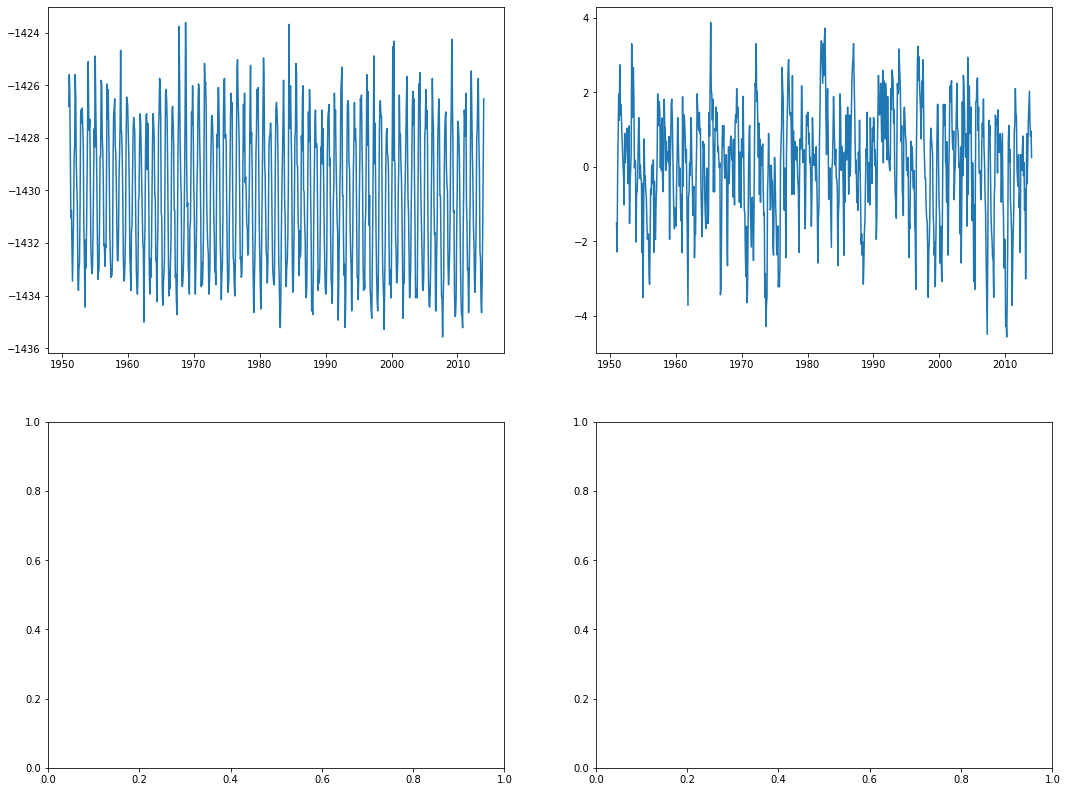

In [244]:
fig, ax = plt.subplots(2,2, figsize=(18,14))
ax[0,0].plot(years, wsoi1);
ax[0,1].plot(years, wsoi2);
#ax[1,0].plot(years, wsoi3);
#ax[1,1].plot(years, wsoi4);